In [269]:
import random
import numpy
import theano
import model
import time

def timer(func):
    def wrapper(*args, **kwargs):
        t1 = time.time()
        res = func(*args, **kwargs)
        t2 = time.time()
        print("It took {} seconds to excecute.".format(t2-t1))
        return res
    
    return wrapper

m = model.Model(artificial_font=True)
m.try_load()
run_fn = m.get_run_fn()
W = m.get_font_embeddings()
cov = numpy.cov(W.T)
imgs = []
font_vects = []
def generate_font():
    return numpy.random.multivariate_normal(mean=numpy.zeros(m.d), cov=cov)

def generate_input(n_fonts=5):
    fonts = [generate_font() for f in xrange(n_fonts)]
    for f in xrange(n_fonts):
        a, b = fonts[f], fonts[(f+1)%n_fonts]
        for p in numpy.linspace(0, 1, 1):
            batch_is = numpy.zeros((m.k, m.d), dtype=theano.config.floatX)
            batch_js = numpy.zeros((m.k,), dtype=numpy.int32)
            for z in xrange(m.k):
                batch_is[z] = a * (1-p) + b * p
                batch_js[z] = z

            yield batch_is, batch_js

# # Print one character from result
# import PIL
# data = run_fn(input_i,input_j).reshape((62, 64, 64))
# PIL.Image.fromarray(numpy.uint8(((1.0 - data[10]) * 255))).show()

float64
loading model...


Letter Coordinate: (0, 1)
It took 4.3559589386 seconds to excecute.


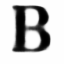

In [274]:
def letter_coord_finder(character='a'):
    c_val = ord(character)
    location = 0
    alphabet_length = 26
    if c_val >= 48 and c_val <= 58 :
        location = (c_val - 48) + alphabet_length*2
    elif c_val >= 65 and c_val <= 90:
        location = (c_val - 65)
    elif c_val >= 97 and c_val <= 122:
        location = (c_val - 97) + alphabet_length
    else:
        raise Exception('Character Out of Range')
    return (location / 8, location % 8) #cols are 8 long

@timer
def generate_training_data(n_examples=10, cropped_letter='B'):
    let_c = letter_coord_finder(cropped_letter)
    print("Letter Coordinate: ({}, {})".format(*let_c))
    numpy.random.seed(100)
    letter_size = 64
    crop_coords = (letter_size*let_c[1], letter_size*let_c[0], letter_size*(let_c[1]+1), letter_size*(let_c[0]+1)) # Location of B in generated Image
    X_train = []
    y_train = []
    for input_i, input_j in generate_input(n_examples):
        img = model.draw_grid(run_fn(input_i, input_j))
        X_train.append(numpy.array(img.crop(crop_coords)))
        y_train.append(input_i[0])
    return X_train, y_train

X,Y = generate_training_data(100)
PIL.Image.fromarray(X[1])
